<a href="https://colab.research.google.com/github/sera0911/asia_ai_study/blob/main/new_machinLearning/exam01_Introduction_to_machin_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 머신러닝 입문


## linear regression

###기존의 프로그래밍 방식

In [3]:
def celsius_to_fahrenheit(x):
    return x * 1.8 + 32   #머신러닝을 돌리면 1.8=기울기, 32= y절편(편향값)

In [4]:
celsius_value = int(input('섭씨온도를 입력하세요.'))
print('화씨온도로', celsius_to_fahrenheit(celsius_value))

섭씨온도를 입력하세요.20
화씨온도로 68.0


### 머신러닝 방식

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data_C = np.array(range(0, 100))
data_F = celsius_to_fahrenheit(data_C)
print(data_C)
print(data_F)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[ 32.   33.8  35.6  37.4  39.2  41.   42.8  44.6  46.4  48.2  50.   51.8
  53.6  55.4  57.2  59.   60.8  62.6  64.4  66.2  68.   69.8  71.6  73.4
  75.2  77.   78.8  80.6  82.4  84.2  86.   87.8  89.6  91.4  93.2  95.
  96.8  98.6 100.4 102.2 104.  105.8 107.6 109.4 111.2 113.  114.8 116.6
 118.4 120.2 122.  123.8 125.6 127.4 129.2 131.  132.8 134.6 136.4 138.2
 140.  141.8 143.6 145.4 147.2 149.  150.8 152.6 154.4 156.2 158.  159.8
 161.6 163.4 165.2 167.  168.8 170.6 172.4 174.2 176.  177.8 179.6 181.4
 183.2 185.  186.8 188.6 190.4 192.2 194.  195.8 197.6 199.4 201.2 203.
 204.8 206.6 208.4 210.2]


In [8]:
#모델생성

model = Sequential()
model.add(InputLayer(input_shape=(1,)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='rmsprop')
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
#데이터 정규화

scaled_data_C = data_C / 100  #스케일링 처리를 위해서 100으로 나눠서 작은 수로 만들기
scaled_data_F = data_F / 100
print(scaled_data_C)
print(scaled_data_F)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
[0.32  0.338 0.356 0.374 0.392 0.41  0.428 0.446 0.464 0.482 0.5   0.518
 0.536 0.554 0.572 0.59  0.608 0.626 0.644 0.662 0.68  0.698 0.716 0.734
 0.752 0.77  0.788 0.806 0.824 0.842 0.86  0.878 0.896 0.914 0.932 0.95
 0.968 0.986 1.004 1.022 1.04  1.058 1.076 1.094 1.112 1.13  1.148 1.166
 1.184 1.202 1.22  1.238 1.256 1.274 1.292 1.31  1.328 1.346 1.364 1.382
 1.4   1.418 1.436 1.454 1.472 1.49  1.508 1.526 1.544 1.562 1.58  1.598
 1.616 1.634 1.652 1.67  1.688 1.706 1.724 1.742 1.76 

In [10]:
#학습 전 모델 예측해보기

model.predict([0.01])

#실제 정답 33.8

array([[0.006541]], dtype=float32)

In [11]:
#학습 전 모델 저장하기

model.save('before_learning.h5')

In [ ]:
#모델 학습 : 데이터를 줘서 함수의 관계를 알아내기

fit_hist = model.fit(scaled_data_C, scaled_data_F, epochs=1000)

In [13]:
#학습 후 값 예측해보기

print(model.predict([0.01])) 

#실제정답 33.8

[[0.3381736]]


In [14]:
#학습 된 모델 저장하기

model.save('after_learning.h5')

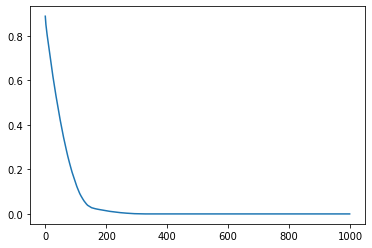

In [16]:
plt.plot(fit_hist.history['loss'])  #loss epoch값을 plt로 확인
plt.show()

- HDFView프로그램을 실행시켜서 저장한 모델들에 대해서 살펴보기

before_learning.h5 = bias:0, kernel: random값 (학습시키지 않아서)    
after_learning.h5 = bias:0.32017, kernel: 1.8001  (실제값 32, 1.8와 유사하게 나온다)  

bias = y절편, kernel = 기울기

- 잡음이 있는 실제 데이터 넣어보기

In [20]:
#랜덤값 생성방식

noise = np.array(np.random.normal(0, 0.05, 100))   #np에서 normal은 정규분포, normal(0, 05, 100) = 평균이 0, 표준편차가 0.05인 random값 100개 생성
print(noise)

[-5.49018889e-02  4.75632306e-02  3.17135893e-02  6.20440667e-02
  5.64648532e-02  8.66380394e-03  7.25014146e-02  5.52100156e-03
 -8.08513550e-02 -8.89645392e-03  6.41669656e-02  6.67820443e-02
  1.02004758e-01 -2.74172388e-02 -1.82104055e-02  3.31858353e-03
  3.52363346e-02 -3.20036442e-02 -7.35983988e-02 -2.37833501e-02
 -1.44980892e-02  6.36576103e-02  6.99449484e-02  7.51417391e-02
  3.46069793e-06 -3.25445572e-02  2.06132053e-02 -3.94090131e-02
 -3.42420409e-02 -7.80706765e-03  7.19623746e-02 -6.63894077e-02
 -3.22232974e-03  1.62218815e-02  1.09827439e-02  9.42988337e-03
  1.22018023e-01  2.08106539e-02 -8.65979407e-03  4.95946563e-02
 -4.78742413e-02  5.11903670e-02  3.98658568e-02 -3.89570146e-02
 -2.57311382e-02  2.67341514e-03  5.83101716e-02  7.37238841e-02
  2.54835449e-02 -4.57008991e-02 -2.80671372e-02 -1.41379339e-01
  4.03279593e-02  7.18457708e-03 -5.43426072e-02 -3.55226933e-02
  4.79031585e-02  6.67171595e-03 -6.03343834e-02 -6.92108211e-02
  3.04500531e-02 -1.38279

In [23]:
#noised_scaled_data_F 설정

noised_scaled_data_F = np.array([])  #array생성
for data in scaled_data_F:
    noised_scaled_data_F = np.append(
        noised_scaled_data_F, np.random.normal(0, 0.05, 100) + data  #각각의 화씨값에 np.random값 넣기, 100개의 데이터의 100개의 랜덤값을 넣어 10000개의 데이터가 된다
    )

print(noised_scaled_data_F)
print(len(noised_scaled_data_F))  #데이터 10000개

[0.32636233 0.30557676 0.31198202 ... 2.13110222 2.06944911 2.08046692]
10000


In [27]:
#noised_scaled_data_C 설정

noised_scaled_data_C = []  #빈리스트생성
for data in range(0, 100):  #10000개의 데이터 생성을 위한 반복문
    for i in range(0, 100):
        noised_scaled_data_C.append(data)


noised_scaled_data_C = np.array(noised_scaled_data_C)  #np.array형식으로 변환
noised_scaled_data_C = noised_scaled_data_C / 100  #정규화

print(noised_scaled_data_C)
print(len(noised_scaled_data_C))  #10000개의 입력데이터

[0.   0.   0.   ... 0.99 0.99 0.99]
10000


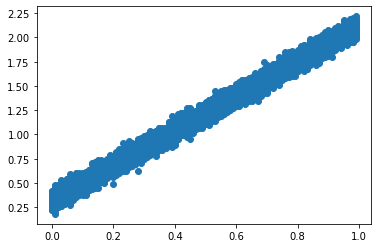

In [29]:
plt.scatter(x= noised_scaled_data_C, y= noised_scaled_data_F)
plt.show()

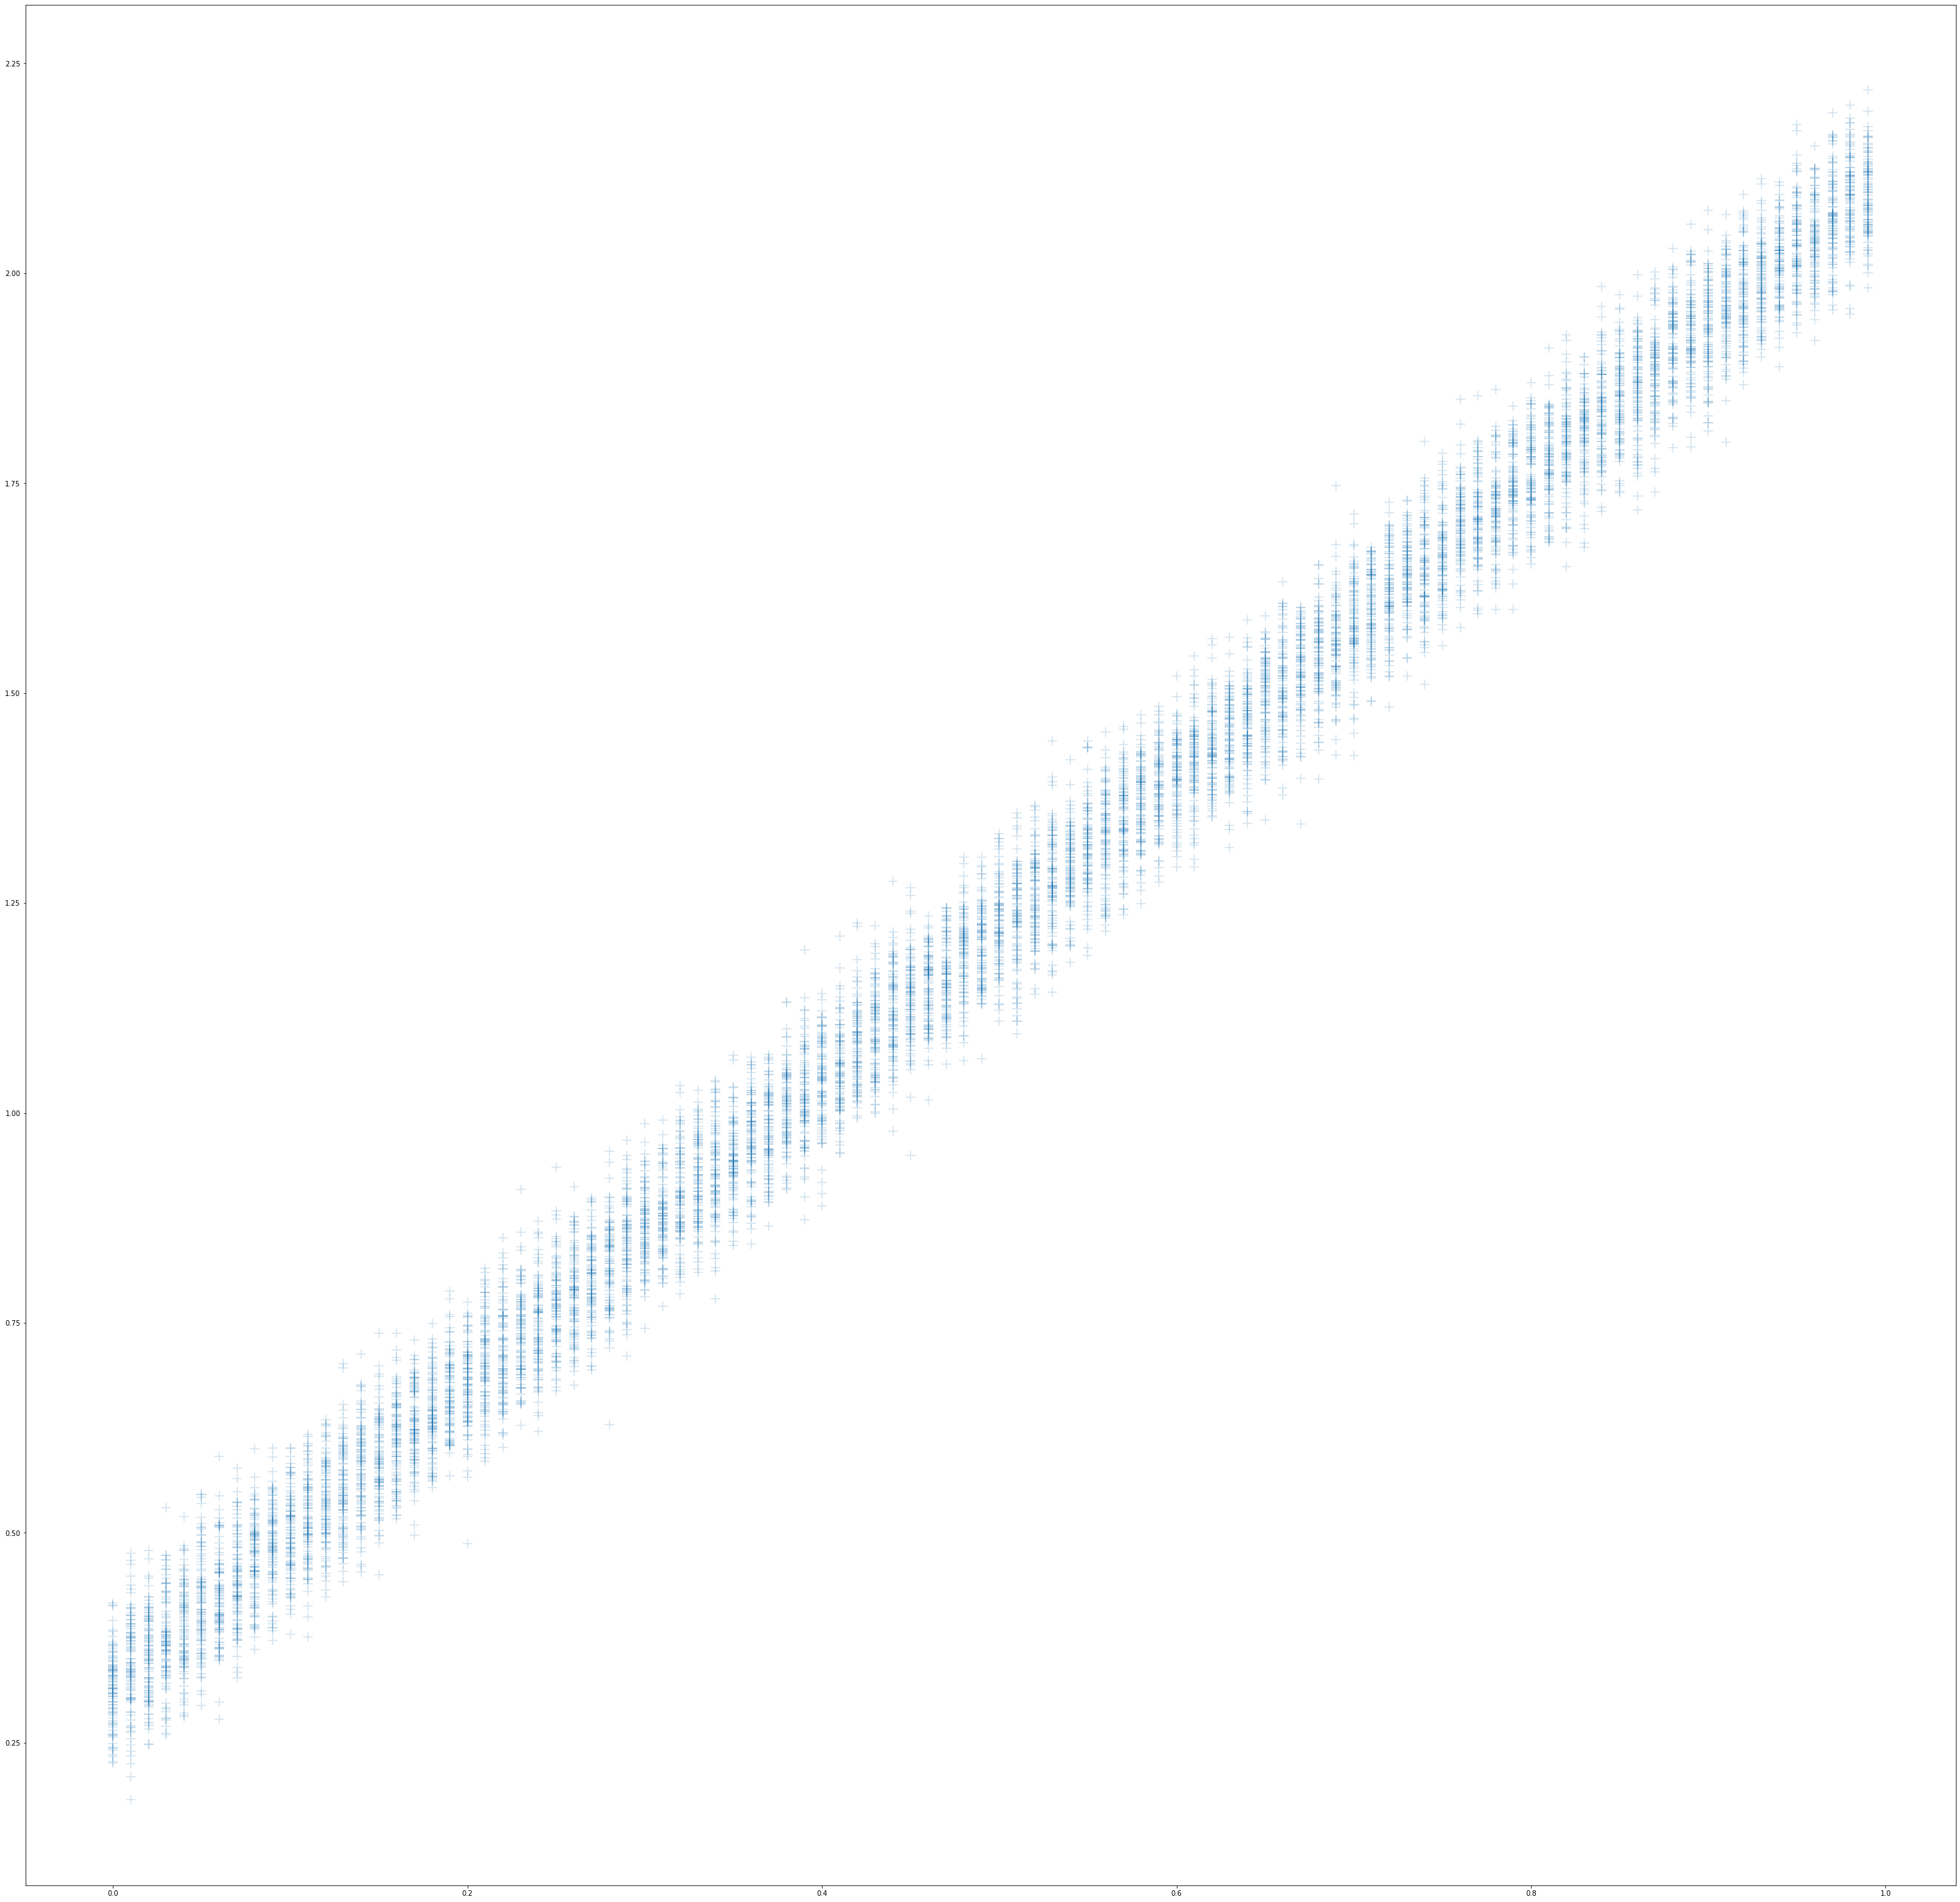

In [30]:
fig = plt.figure(figsize=(50, 50))
ax = fig.add_subplot(111)
ax.scatter(x=noised_scaled_data_C,
           y=noised_scaled_data_F, alpha=0.2, s=200, marker='+')  # alpha=투명도
plt.show()

#그림에서 가운데에 몰려있는 데이터들은 잡음이 없는 화씨온도 데이터

In [31]:
#새로운 모델 생성, 아까 윗 모델과 같이 만들되 데이터만 다르게 넣을 예정

model2 = Sequential()
model2.add(InputLayer(input_shape=(1,)))
model2.add(Dense(1))
model2.compile(loss='mse', optimizer='rmsprop')
print(model2.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


In [33]:
#학습 전 모델 예측해보기

print(model2.predict([0.01]))

[[-0.01194632]]


In [34]:
#모델 학습

fit_hist = model2.fit(noised_scaled_data_C, noised_scaled_data_F, epochs=20)

Epoch 1/20
313/313 [==============================] - 1s 1ms/step - loss: 3.1312
Epoch 2/20
313/313 [==============================] - 0s 1ms/step - loss: 1.7660
Epoch 3/20
313/313 [==============================] - 0s 1ms/step - loss: 0.8474
Epoch 4/20
313/313 [==============================] - 0s 1ms/step - loss: 0.3691
Epoch 5/20
313/313 [==============================] - 0s 1ms/step - loss: 0.2250
Epoch 6/20
313/313 [==============================] - 0s 1ms/step - loss: 0.1547
Epoch 7/20
313/313 [==============================] - 0s 1ms/step - loss: 0.0970
Epoch 8/20
313/313 [==============================] - 0s 1ms/step - loss: 0.0531
Epoch 9/20
313/313 [==============================] - 0s 1ms/step - loss: 0.0229
Epoch 10/20
313/313 [==============================] - 0s 1ms/step - loss: 0.0066
Epoch 11/20
313/313 [==============================] - 0s 1ms/step - loss: 0.0025
Epoch 12/20
313/313 [==============================] - 0s 1ms/step - loss: 0.0024
Epoch 13/20
313/313 [====

In [35]:
#모델 저장해서 hdfview에서 확인해보기

model.save('noised_after_learning.h5')

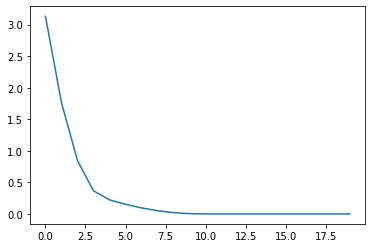

In [36]:
#모델 학습한 결과 그려보기

plt.plot(fit_hist.history['loss'])
plt.show()

In [37]:
print(model2.predict([0.01]))

#실제값 0.338 

[[0.33965656]]


- HDFView프로그램을 실행시켜서 저장한 모델들에 대해서 살펴보기

noised_after_learning.h5 = bias:0.32017, kernel: 1.8001 (실제값 32, 1.8와 유사하게 나온다)


**확인 결과 : 잡음이 섞여 있어도 위 모델과 똑같이 나온다**